In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
plt.style.use("default")
sns.set()

In [2]:
df = pd.read_csv('pokemon_stats_2025.csv')

In [3]:
df.head()

,pokedex_id,name,height,weight,base_experience,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed
0,1,Bulbasaur,7,69,64,grass,poison,45,49,49,65,65,45
1,2,Ivysaur,10,130,142,grass,poison,60,62,63,80,80,60
2,3,Venusaur,20,1000,236,grass,poison,80,82,83,100,100,80
3,4,Charmander,6,85,62,fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,11,190,142,fire,NaN,58,64,58,80,65,80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_id       250 non-null    int64 
 1   name             250 non-null    object
 2   height           250 non-null    int64 
 3   weight           250 non-null    int64 
 4   base_experience  250 non-null    int64 
 5   type_1           250 non-null    object
 6   type_2           115 non-null    object
 7   hp               250 non-null    int64 
 8   attack           250 non-null    int64 
 9   defense          250 non-null    int64 
 10  special_attack   250 non-null    int64 
 11  special_defense  250 non-null    int64 
 12  speed            250 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 25.5+ KB


In [5]:
df.describe()

,pokedex_id,height,weight,base_experience,hp,attack,defense,special_attack,special_defense,speed
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,11.844000,473.768000,136.244000,66.776000,70.944000,68.684000,65.952000,68.452000,65.880000
std,72.312977,10.117962,617.573294,74.252368,29.779879,27.462806,30.439224,27.343525,27.463296,27.286109
min,1.000000,2.000000,1.000000,36.000000,10.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,63.250000,6.000000,88.500000,65.000000,48.500000,50.000000,49.250000,45.000000,50.000000,45.000000
50%,125.500000,10.000000,295.000000,142.000000,65.000000,70.000000,65.000000,64.000000,65.000000,65.000000
75%,187.750000,15.000000,576.250000,175.000000,80.000000,90.000000,85.000000,85.000000,84.500000,85.000000
max,250.000000,92.000000,4600.000000,608.000000,255.000000,134.000000,230.000000,154.000000,230.000000,150.000000


In [6]:
df.shape

(250, 13)

In [8]:
df.isnull().sum()

pokedex_id           0
name                 0
height               0
weight               0
base_experience      0
type_1               0
type_2             135
hp                   0
attack               0
defense              0
special_attack       0
special_defense      0
speed                0
dtype: int64

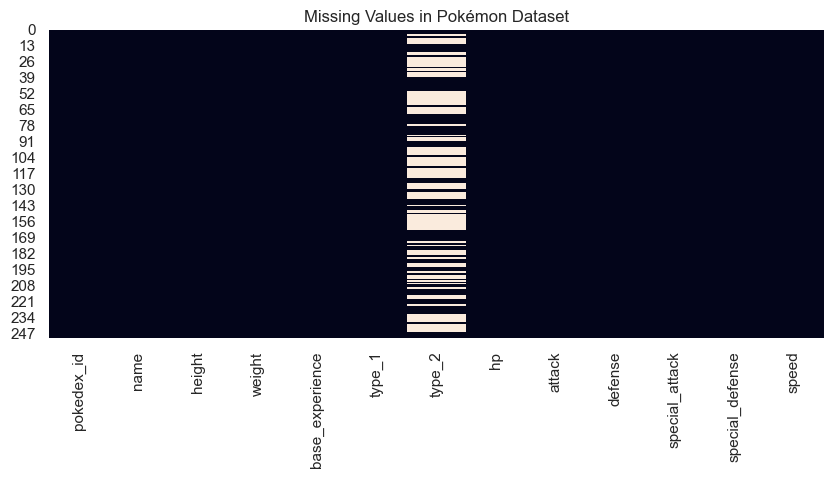

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values in Pokémon Dataset")
plt.show()
plt.savefig("missing_values_heatmap.png")

In [10]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ["Column", "Missing Values"]

fig = px.bar(
    missing_df,
    x="Column",
    y="Missing Values",
    text="Missing Values",
    title="Missing Values per Column"
)

fig.update_traces(textposition="outside")
fig.show()

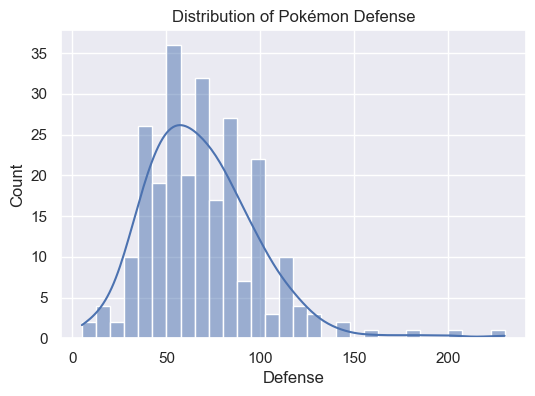

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['defense'],bins=30, kde = True)
plt.title("Distribution of Pokémon Defense")
plt.xlabel("Defense")
plt.ylabel("Count")
plt.show()
plt.savefig("defense_distribution.png")

In [13]:
fig = px.histogram(
    df,
    x="defense",
    nbins=30,
    title="Distribution of Pokémon Defense"
)
fig.show()

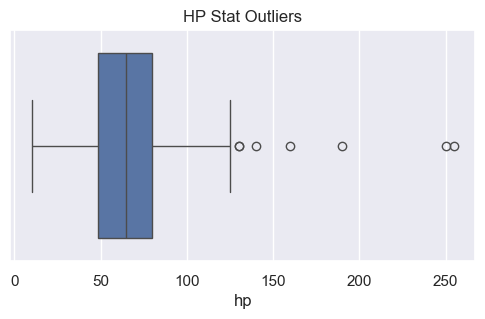

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['hp'])
plt.title("HP Stat Outliers")
plt.show()
plt.savefig("hp_outliers_boxplot.png")

In [16]:
fig = px.box(
    df,
    x="hp",
    title="Attack Stat Outliers"
)
fig.show()

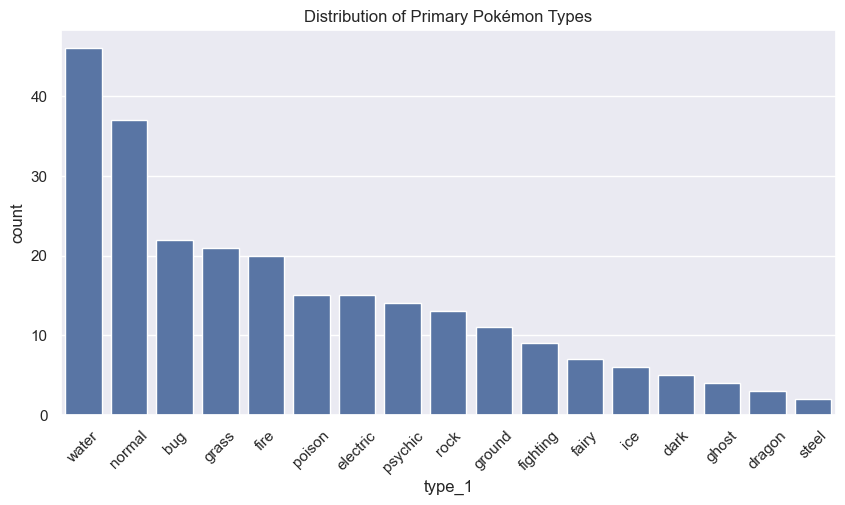

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='type_1', data=df, order=df['type_1'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Primary Pokémon Types")
plt.show()
plt.savefig("primary_type_distribution.png")

In [18]:
type_counts = df["type_1"].value_counts().reset_index()
type_counts.columns = ["Type", "Count"]

fig = px.bar(
    type_counts,
    x="Type",
    y="Count",
    title="Distribution of Primary Pokémon Types"
)
fig.show()

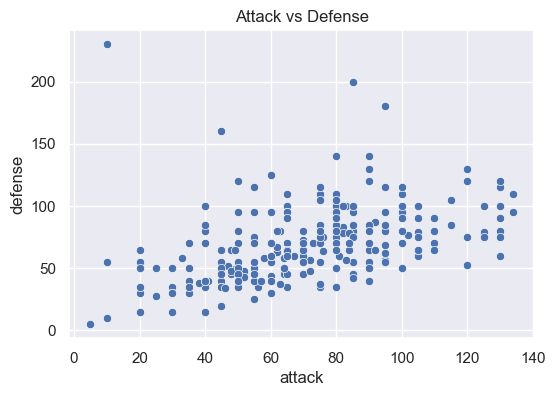

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='attack', y='defense', data=df)
plt.title("Attack vs Defense")
plt.show()
plt.savefig("attack_vs_defense_scatter.png")

In [20]:
fig = px.scatter(
    df,
    x="attack",
    y="defense",
    hover_name="name",
    title="Attack vs Defense"
)
fig.show()


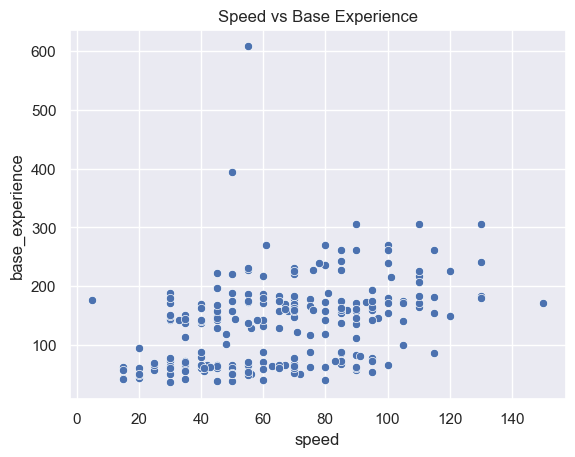

<Figure size 640x480 with 0 Axes>

In [22]:
sns.scatterplot(x='speed', y='base_experience', data=df)
plt.title("Speed vs Base Experience")
plt.show()
plt.savefig("speed_vs_base_experience_scatter.png")

In [23]:
fig = px.scatter(
    df,
    x="speed",
    y="base_experience",
    hover_name="name",
    title="Speed vs Base Experience"
)
fig.show()

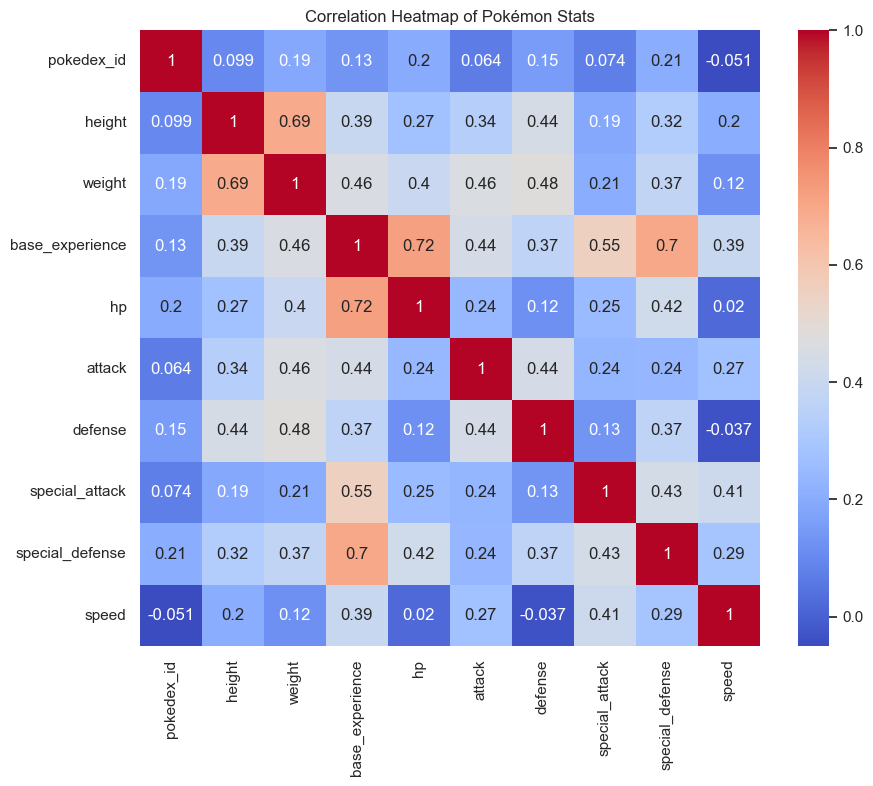

<Figure size 640x480 with 0 Axes>

In [24]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Pokémon Stats")
plt.show()
plt.savefig("correlation_heatmap.png")

In [25]:
numeric_df = df.select_dtypes(include=["int64", "float64"]).drop(columns=["pokedex_id"])
corr = numeric_df.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    title="Correlation Heatmap of Pokémon Numeric Stats"
)
fig.show()

In [26]:
fig = px.scatter_matrix(
    df,
    dimensions=["hp", "attack", "defense", "speed"],
    hover_name="name",
    title="Multivariate Analysis of Pokémon Stats"
)
fig.show()

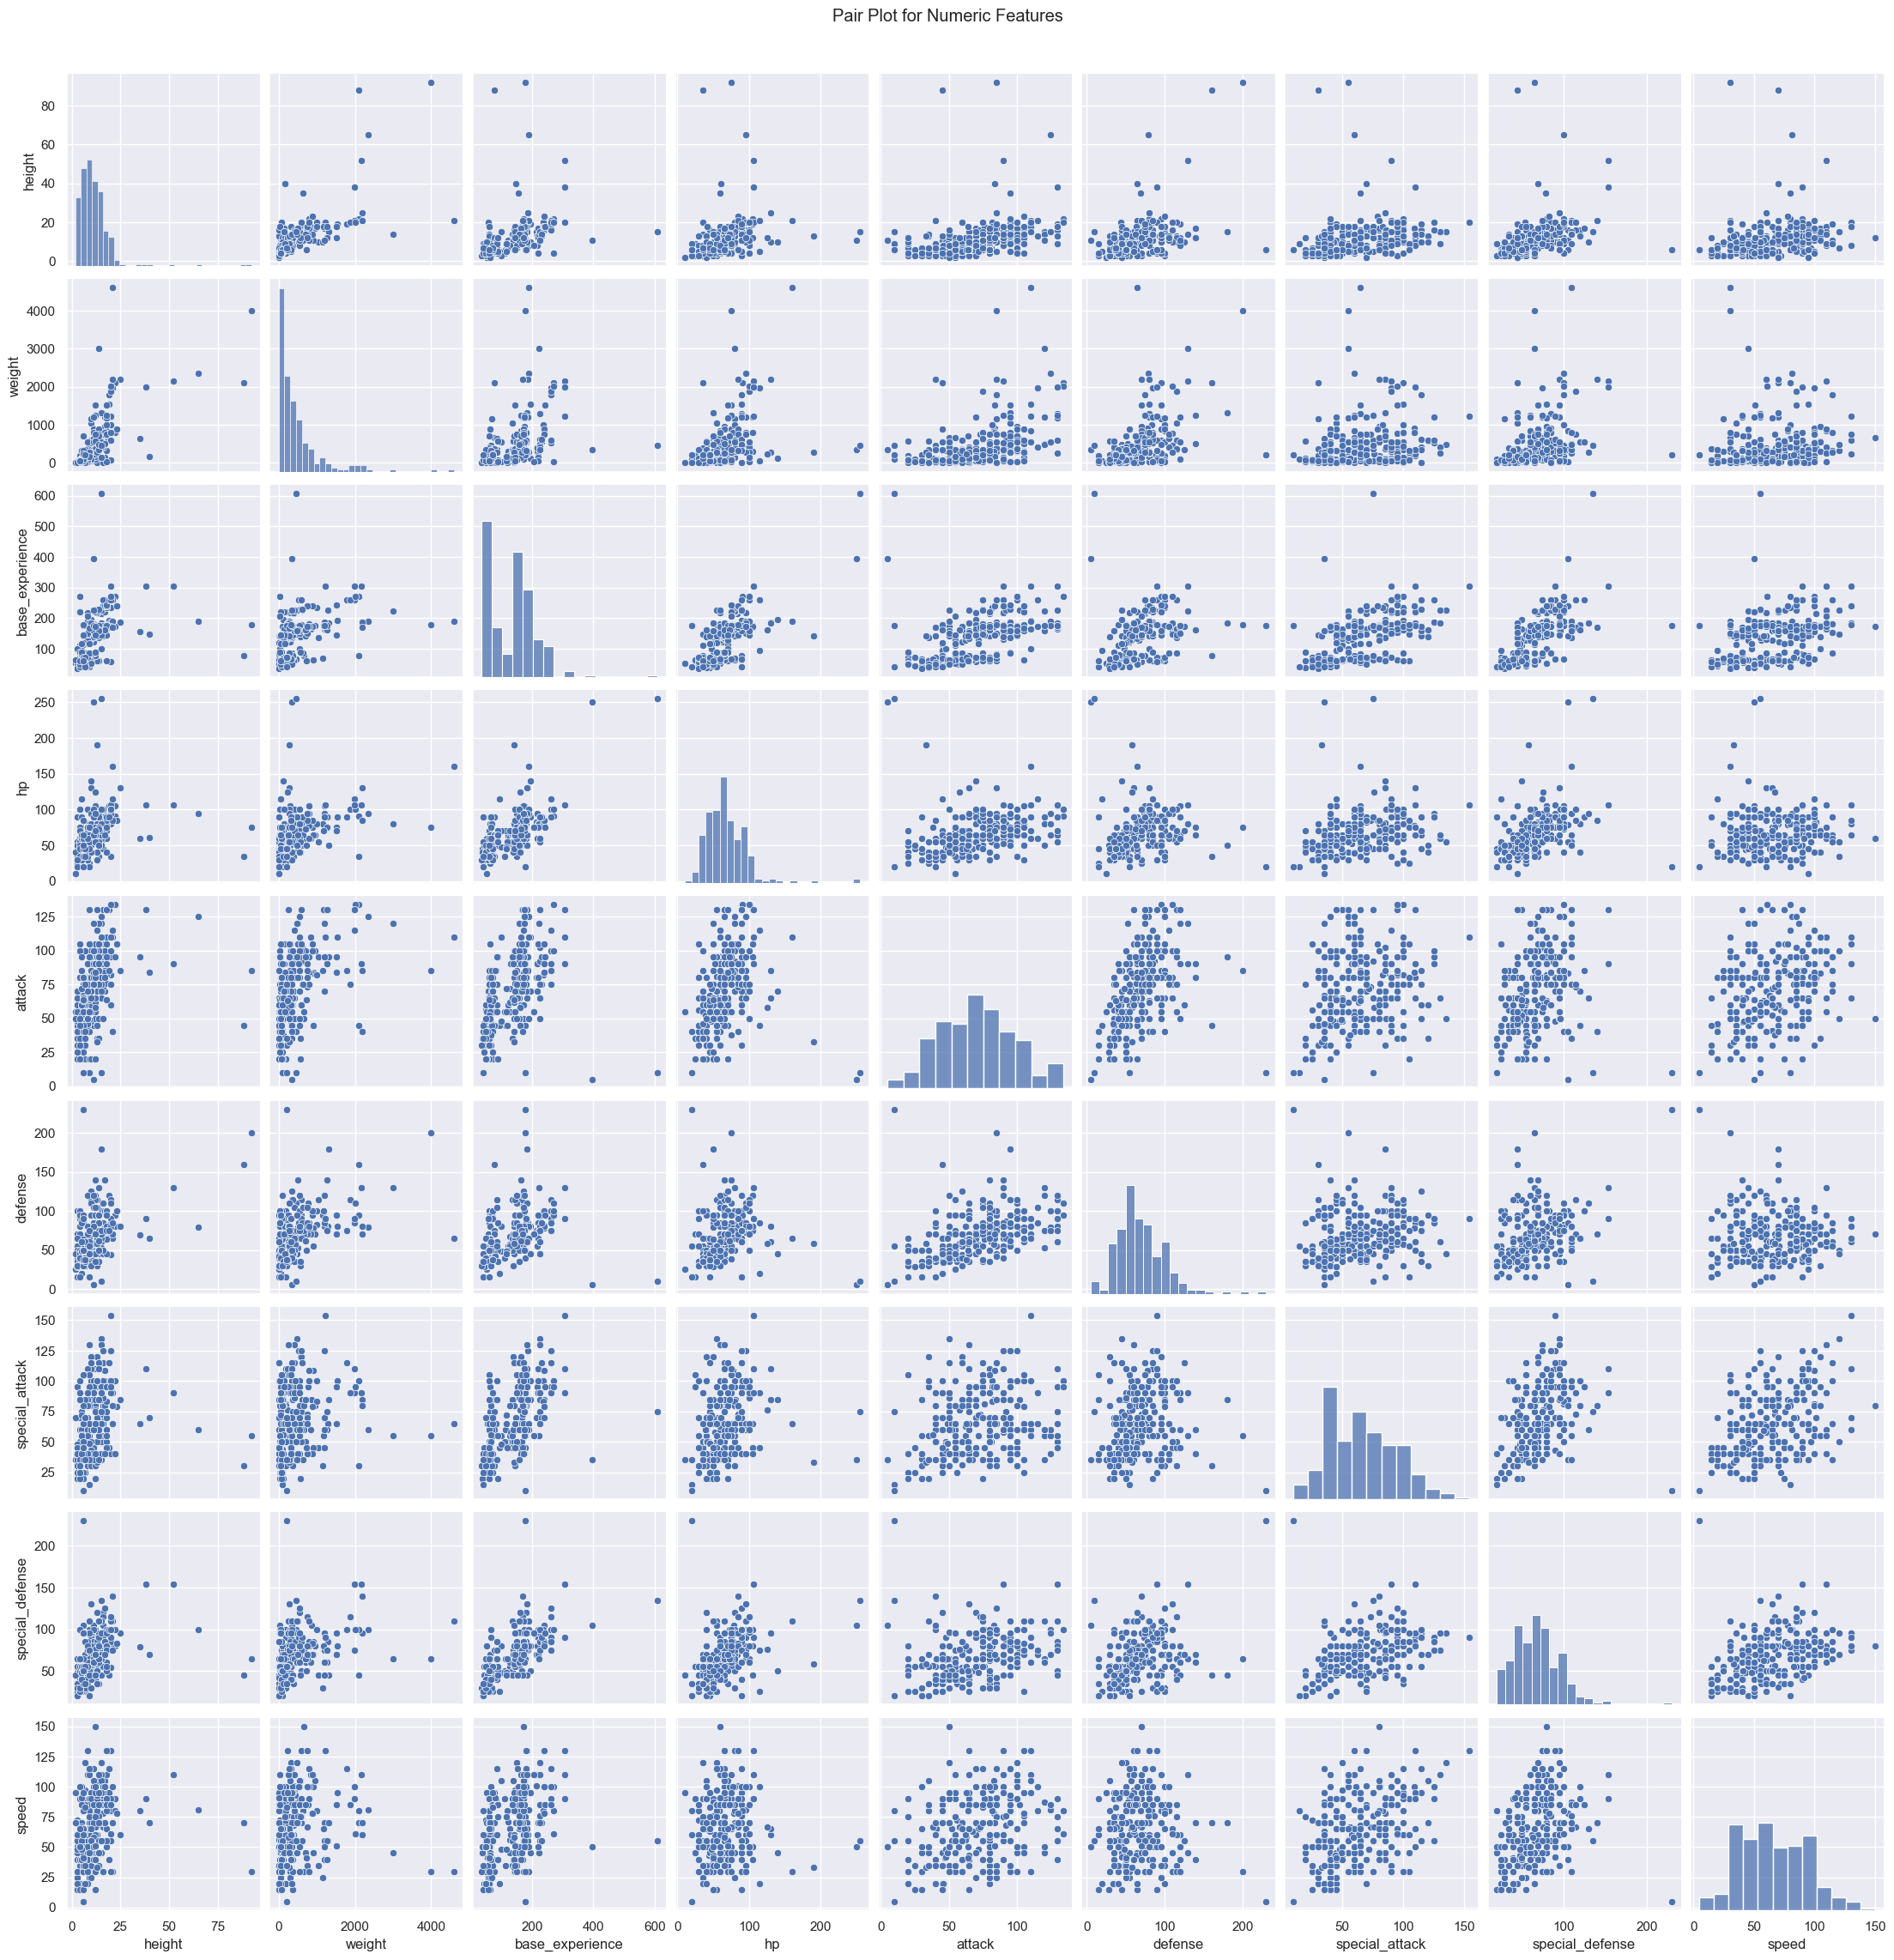

<Figure size 640x480 with 0 Axes>

In [27]:
sns.pairplot(numeric_df, diag_kind='hist')
plt.suptitle('Pair Plot for Numeric Features', y=1.02)
plt.show()
plt.savefig("pairplot_numeric_features.png")

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_61203/799489268.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




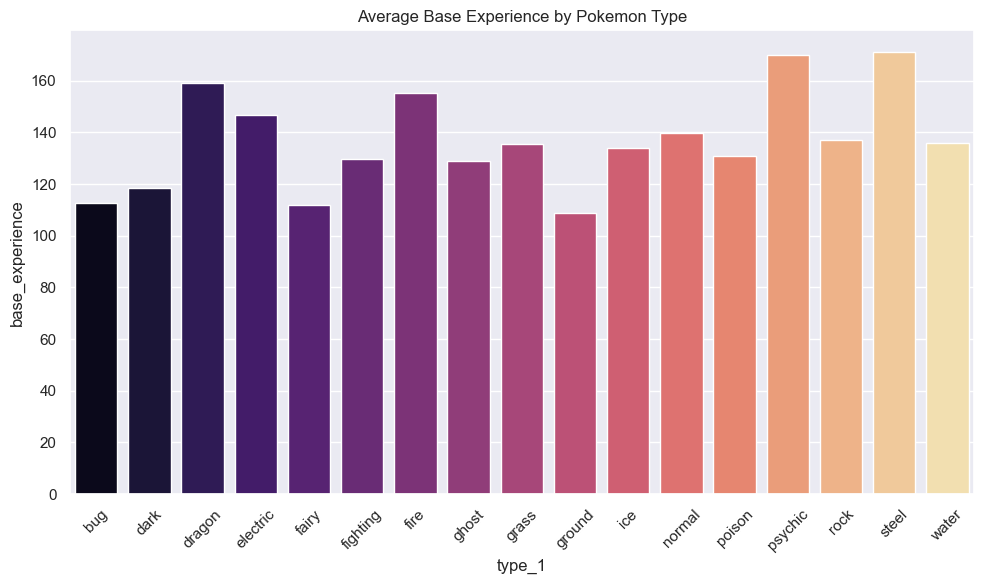

<Figure size 640x480 with 0 Axes>

In [29]:
avg_exp = df.groupby('type_1')['base_experience'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='type_1', y='base_experience', data=avg_exp, palette='magma')
plt.title('Average Base Experience by Pokemon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("average_base_experience_by_type.png")

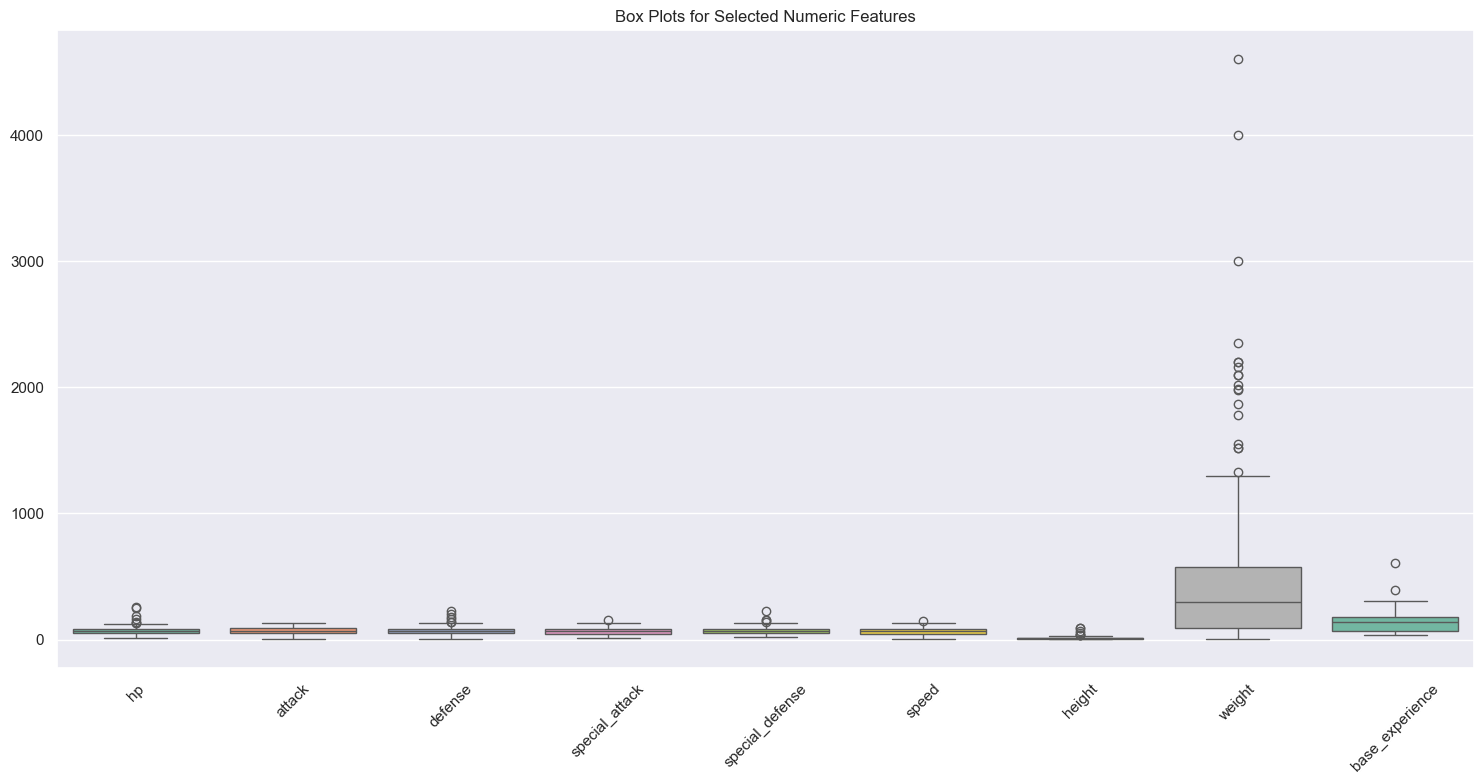

<Figure size 640x480 with 0 Axes>

In [30]:
numeric_features = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'height', 'weight', 'base_experience']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_features], palette='Set2')
plt.title('Box Plots for Selected Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("boxplots_numeric_features.png")

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

Prediction Accuracy: 0.36


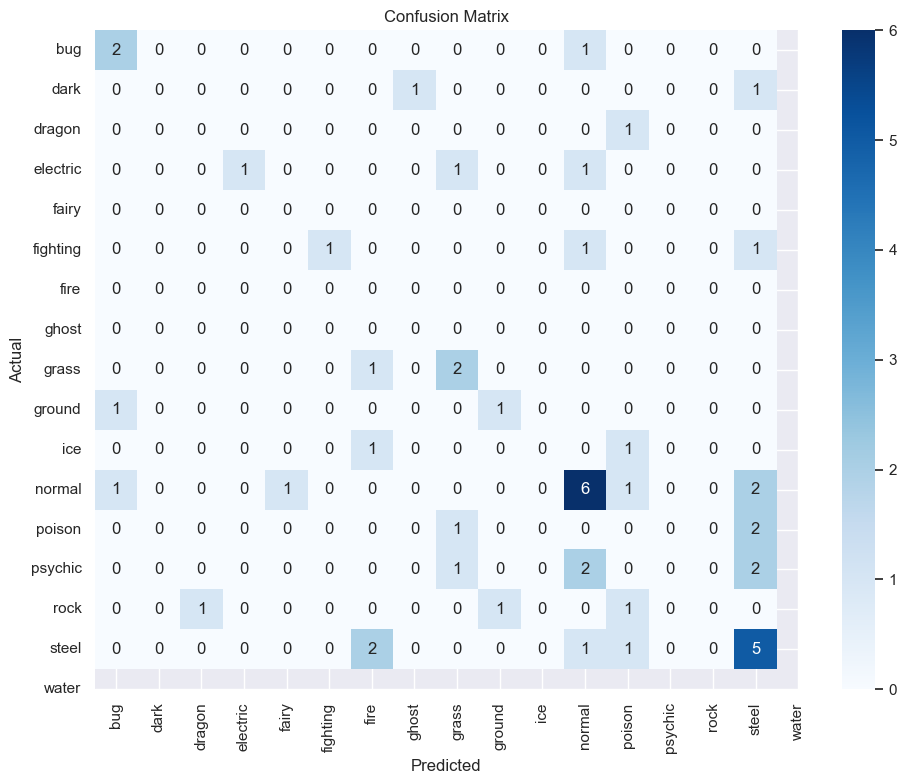

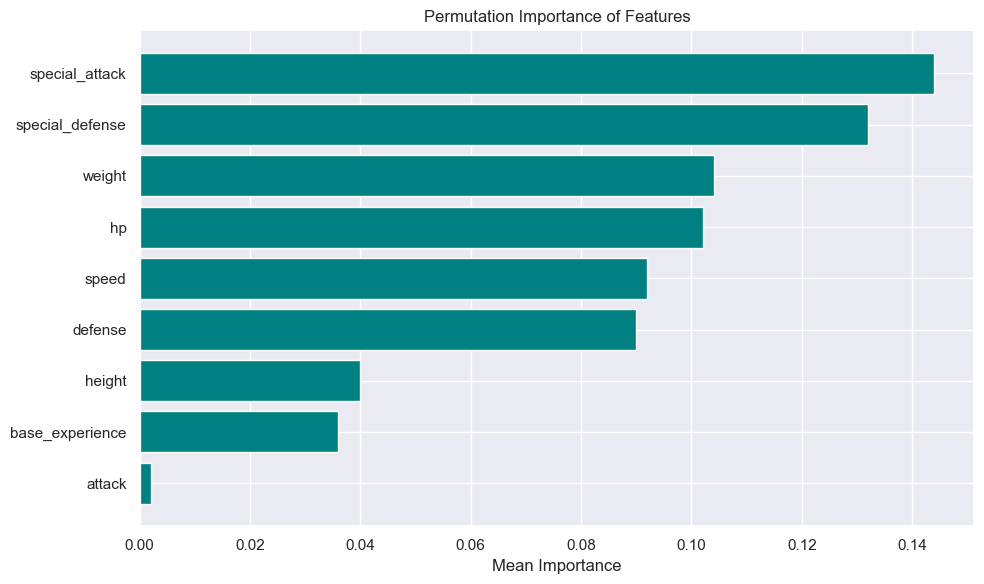

<Figure size 640x480 with 0 Axes>

In [33]:
feature_columns = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'height', 'weight', 'base_experience']
X = df[feature_columns]
y = df['type_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

perm_importance = permutation_importance(rf_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'feature': feature_columns, 'importance': perm_importance.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='teal')
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()
plt.savefig("permutation_importance.png")